In [108]:
import numpy as np
import matplotlib.pyplot as plt
from pde import PDEBase, ScalarField, UnitGrid, CartesianGrid
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [242]:
def generate_KS_surfaces(n,r,t):
    surfaces = []

    class KuramotoSivashinskyPDE(PDEBase):
        def evolution_rate(self, state,t0=0):
            state_lap = state.laplace(bc="auto_periodic_neumann")
            state_lap2 = state_lap.laplace(bc="auto_periodic_neumann")
            state_grad_x = state.gradient(bc="auto_periodic_neumann")[0]
            state_grad_y = state.gradient(bc="auto_periodic_neumann")[1]
            return r*state_grad_x.to_scalar()**2 + state_grad_y.to_scalar()**2  - state_lap - state_lap2

    
    grid = UnitGrid([100, 100])  # generate grid
    state = ScalarField.random_uniform(grid)  # generate initial condition
    
    for i in range(n):
        state = ScalarField.random_uniform(grid)  # generate initial condition
        eq  = KuramotoSivashinskyPDE()
        result = eq.solve(state, t, dt=0.01)
        surfaces.append(result.data)

    return surfaces

In [247]:
surfaces = generate_KS_surfaces(n=10,r=3,t=15)

  0%|          | 0/15.0 [00:00<?, ?it/s]              

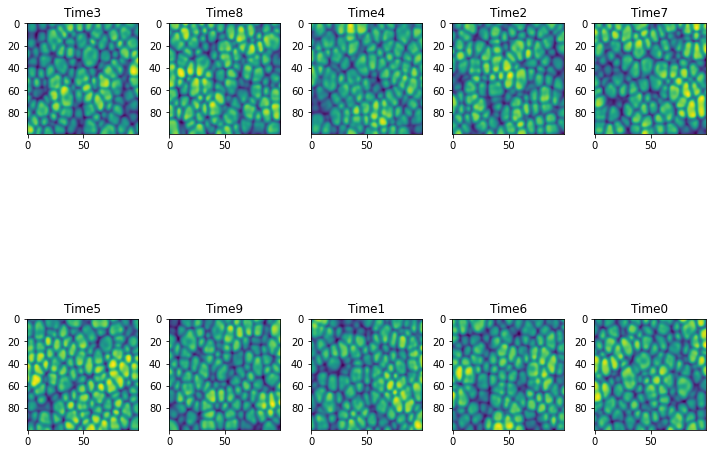

In [ ]:
width=2
height=1
rows = 2
cols = 5
axes=[]
fig=plt.figure(figsize=(10,10))

for idx, a in enumerate(np.random.choice(len(surfaces),rows*cols,replace=False)):
    b = surfaces[a]
    axes.append( fig.add_subplot(rows, cols, idx+1) )
    subplot_title=("Time"+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()

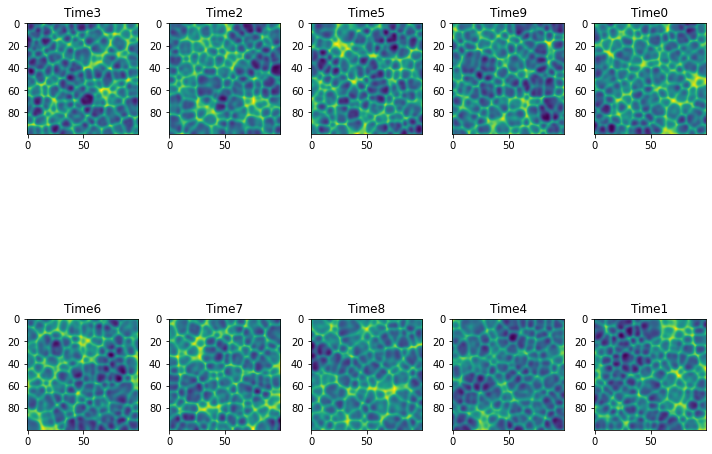

In [160]:
width=2
height=1
rows = 2
cols = 5
axes=[]
fig=plt.figure(figsize=(10,10))

for idx, a in enumerate(np.random.choice(len(surfaces),rows*cols,replace=False)):
    b = surfaces[a]
    axes.append( fig.add_subplot(rows, cols, idx+1) )
    subplot_title=("Time"+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()

In [26]:
def get_pde(r):
    class KuramotoSivashinskyPDE(PDEBase):
        """Implementation of the normalized Kuramoto–Sivashinsky equation"""
        def evolution_rate(self, state, t=0):
            """implement the python version of the evolution equation"""
            state_lap = state.laplace(bc="auto_periodic_neumann")
            state_lap2 = state_lap.laplace(bc="auto_periodic_neumann")
            state_grad = state.gradient(bc="auto_periodic_neumann")
            return -r*state_grad.to_scalar("squared_sum") / 2 - state_lap - state_lap2
    ks = KuramotoSivashinskyPDE()
    return ks


100%|██████████| 5.0/5.0 [00:00<00:00, 18.03it/s]    
100%|██████████| 6.0/6.0 [00:00<00:00, 20.38it/s]    
100%|██████████| 7.0/7.0 [00:00<00:00, 21.77it/s]    
100%|██████████| 8.0/8.0 [00:00<00:00, 21.02it/s]    
100%|██████████| 9.0/9.0 [00:00<00:00, 21.43it/s]    
100%|██████████| 10.0/10.0 [00:00<00:00, 21.11it/s]   
100%|██████████| 11.0/11.0 [00:00<00:00, 20.09it/s]   
100%|██████████| 12.0/12.0 [00:00<00:00, 22.59it/s]   
100%|██████████| 13.0/13.0 [00:00<00:00, 21.07it/s]   
100%|██████████| 14.0/14.0 [00:00<00:00, 22.96it/s]   
100%|██████████| 15.0/15.0 [00:00<00:00, 22.90it/s]   
100%|██████████| 16.0/16.0 [00:00<00:00, 23.11it/s]   
100%|██████████| 17.0/17.0 [00:00<00:00, 22.12it/s]   
100%|██████████| 18.0/18.0 [00:00<00:00, 23.07it/s]   
100%|██████████| 19.0/19.0 [00:00<00:00, 20.03it/s]   
100%|██████████| 5.0/5.0 [00:00<00:00, 14.64it/s]    
100%|██████████| 6.0/6.0 [00:00<00:00, 15.25it/s]    
100%|██████████| 7.0/7.0 [00:00<00:00, 13.75it/s]    
100%|██████████| 8

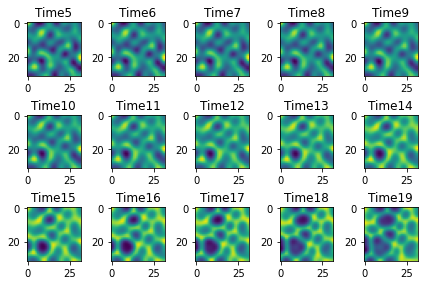

In [47]:
solutions=[]
eq = get_pde(1)  # define the pde
for i in range(10):
    state = ScalarField.random_uniform(grid)  # generate initial condition
    for t_range in range(5,20):
        result = eq.solve(state, t_range, dt=0.01)
        solutions.append(result.data)


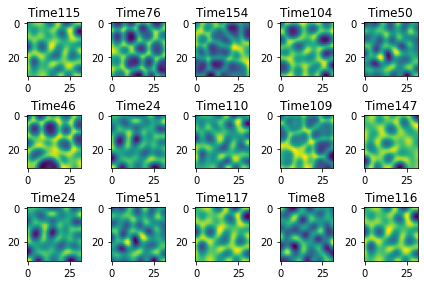

In [48]:
width=2
height=2
rows = 3
cols = 5
axes=[]
fig=plt.figure()

for idx, a in enumerate(np.random.choice(len(solutions),rows*cols)):
    b = solutions[a]
    axes.append( fig.add_subplot(rows, cols, idx+1) )
    subplot_title=("Time"+str(a+5))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()

In [49]:
solutions=[]
eq = get_pde(2)  # define the pde
for i in range(10):
    state = ScalarField.random_uniform(grid)  # generate initial condition
    for t_range in range(5,20):
        result = eq.solve(state, t_range, dt=0.01)
        solutions.append(result.data)

100%|██████████| 5.0/5.0 [00:00<00:00, 17.52it/s]    
100%|██████████| 6.0/6.0 [00:00<00:00, 20.26it/s]    
100%|██████████| 7.0/7.0 [00:00<00:00, 19.77it/s]    
100%|██████████| 8.0/8.0 [00:00<00:00, 19.95it/s]    
100%|██████████| 9.0/9.0 [00:00<00:00, 21.54it/s]    
100%|██████████| 10.0/10.0 [00:00<00:00, 22.33it/s]   
100%|██████████| 11.0/11.0 [00:00<00:00, 22.88it/s]   
100%|██████████| 12.0/12.0 [00:00<00:00, 21.45it/s]   
100%|██████████| 13.0/13.0 [00:00<00:00, 21.19it/s]   
100%|██████████| 14.0/14.0 [00:00<00:00, 21.64it/s]   
100%|██████████| 15.0/15.0 [00:00<00:00, 22.06it/s]   
100%|██████████| 16.0/16.0 [00:00<00:00, 22.43it/s]   
100%|██████████| 17.0/17.0 [00:00<00:00, 23.60it/s]   
100%|██████████| 18.0/18.0 [00:00<00:00, 23.63it/s]   
100%|██████████| 19.0/19.0 [00:00<00:00, 23.81it/s]   
100%|██████████| 5.0/5.0 [00:00<00:00, 20.41it/s]    
100%|██████████| 6.0/6.0 [00:00<00:00, 20.32it/s]    
100%|██████████| 7.0/7.0 [00:00<00:00, 21.53it/s]    
100%|██████████| 8

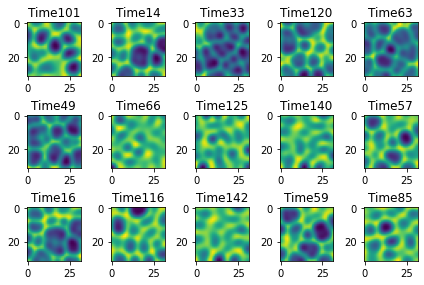

In [50]:
width=2
height=2
rows = 3
cols = 5
axes=[]
fig=plt.figure()

for idx, a in enumerate(np.random.choice(len(solutions),rows*cols)):
    b = solutions[a]
    axes.append( fig.add_subplot(rows, cols, idx+1) )
    subplot_title=("Time"+str(a+5))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()

In [51]:
solutions=[]
eq = get_pde(10)  # define the pde
for i in range(10):
    state = ScalarField.random_uniform(grid)  # generate initial condition
    for t_range in range(5,20):
        result = eq.solve(state, t_range, dt=0.01)
        solutions.append(result.data)

100%|██████████| 5.0/5.0 [00:00<00:00, 16.19it/s]    
100%|██████████| 6.0/6.0 [00:00<00:00, 17.82it/s]    
100%|██████████| 7.0/7.0 [00:00<00:00, 19.72it/s]    
100%|██████████| 8.0/8.0 [00:00<00:00, 20.73it/s]    
100%|██████████| 9.0/9.0 [00:00<00:00, 19.23it/s]    
100%|██████████| 10.0/10.0 [00:00<00:00, 21.73it/s]   
100%|██████████| 11.0/11.0 [00:00<00:00, 20.73it/s]   
100%|██████████| 12.0/12.0 [00:00<00:00, 19.43it/s]   
100%|██████████| 13.0/13.0 [00:00<00:00, 21.50it/s]   
100%|██████████| 14.0/14.0 [00:00<00:00, 20.54it/s]   
100%|██████████| 15.0/15.0 [00:00<00:00, 20.99it/s]   
100%|██████████| 16.0/16.0 [00:00<00:00, 21.77it/s]   
100%|██████████| 17.0/17.0 [00:00<00:00, 23.05it/s]   
100%|██████████| 18.0/18.0 [00:00<00:00, 22.32it/s]   
100%|██████████| 19.0/19.0 [00:00<00:00, 22.99it/s]   
100%|██████████| 5.0/5.0 [00:00<00:00, 19.36it/s]    
100%|██████████| 6.0/6.0 [00:00<00:00, 19.76it/s]    
100%|██████████| 7.0/7.0 [00:00<00:00, 20.73it/s]    
100%|██████████| 8

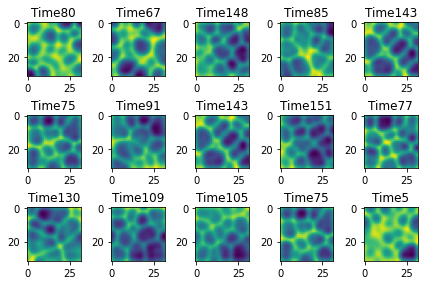

In [52]:
width=2
height=2
rows = 3
cols = 5
axes=[]
fig=plt.figure()

for idx, a in enumerate(np.random.choice(len(solutions),rows*cols)):
    b = solutions[a]
    axes.append( fig.add_subplot(rows, cols, idx+1) )
    subplot_title=("Time"+str(a+5))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()